In [122]:
# conda activate chronocell

import os
import sys
import numpy as np
import anndata as ad

sys.path.append("/mnt/lareaulab/reliscu/programs/FGP_2024")

import Chronocell
print(Chronocell.__version__)

from Chronocell.inference import Trajectory
from Chronocell.mixtures import PoissonMixtureSS
from Chronocell.utils import *
from Chronocell.plotting import *
from Chronocell.models.two_species_ss import get_Y

2024.10


In [123]:
# filepath = os.getcwd() + "/data/simulated_data.h5ad"

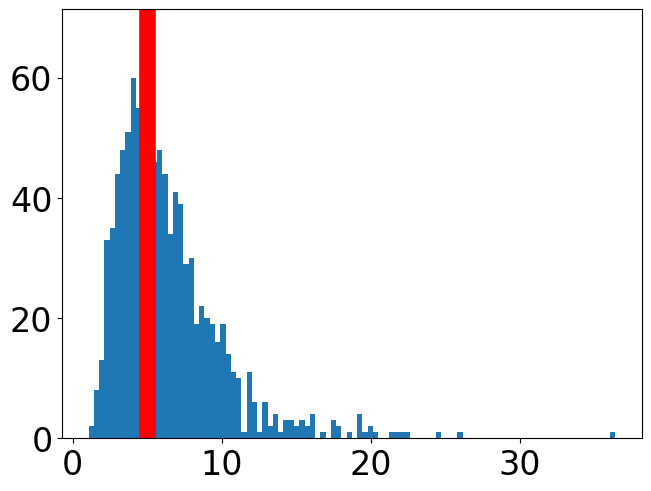

In [ ]:
n = 2000 # No. cells per lineage
p = 1000 # No. genes

topo = np.array([[0, 1, 2], [0 , 1, 3]])
tau = (0, 2, 3)
L = len(topo)
n_states = len(set(topo.flatten()))
# t = np.linspace(tau[0], tau[-1], n)

# Beta
logb_mu = 2
logb_sd = 0.5

beta = np.random.lognormal(logb_mu, logb_sd, size=n)
plt.hist(60*np.log(2)/beta, bins=100);
plt.axvline(x=5, color='r');

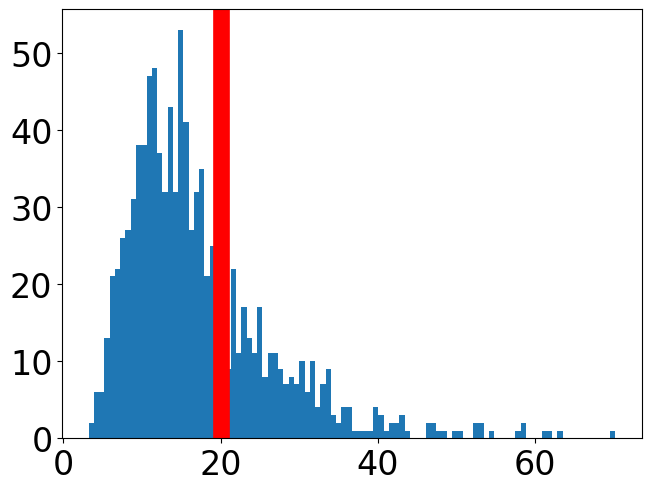

In [184]:
# Gamma
logg_mu = 1
logg_sd = 0.5

gamma = np.random.lognormal(logg_mu, logg_sd, size=n)
np.mean(gamma)
plt.hist(60*np.log(2)/gamma, bins=100);
plt.axvline(x=20, color='r');

In [ ]:

# Alpha
loga_mu = 2
loga_sd = 1

# Read depth
rd_mu = 0.25
rd_var = 1/64
a = (1-rd_mu)/rd_var - rd_mu
b = (1/rd_mu-1)*a
rd = np.random.beta(a=a, b=b, size=n * L)
r = rd/rd.mean()

In [ ]:
np.random.seed(0)

theta = np.zeros((p, n_states + 2))
theta[:,:n_states] = np.random.lognormal(loga_mu, loga_sd, size=(p, n_states)) # Generate transcription rates per gene per cell state
theta[:,-2] = np.random.lognormal(logb_mu, logb_sd, size=p) # Generate splicing rates per gene
theta[:,-1] = np.random.lognormal(logg_mu, logg_sd, size=p) # Generate degradation rates per gene
theta[:,:n_states] /= theta[:,-2] # Normalize by splicing rate - get_Y function expects it in this form

Y = np.zeros((n*L, p, 2))
true_t = []
for l in range(L):
    theta_l = np.concatenate((theta[:,topo[l]], theta[:,-2:]), axis=1)
    t = np.sort(np.random.uniform(tau[0], tau[-1], size=n))
    Y[l*n:(l+1)*n] = get_Y(theta_l, t, tau)
    true_t = np.append(true_t, t)

theta[:,:n_states] *= rd_mu 
Z = rd[:,None,None]*Y
X = np.random.poisson(Z)

In [ ]:
# def simulate_demo_data(topo, tau, n=1000, p=200, null_p=100, t_samples=None, loga_mu=2, loga_sd=1, logb_mu=2, logb_sd=0.5, rd_mu=0.25, rd_var=0.25, phi=0, random_seed=42, filepath=None, plot=True):    
#     np.random.seed(random_seed)
#     L=len(topo)
#     K=len(tau)-1
#     n_states=len(set(topo.flatten()))
    
#     theta=np.zeros((p,n_states+2))
#     theta[:,:n_states]=np.random.lognormal(loga_mu,loga_sd,size=(p,n_states))
#     theta[:,-2:]=np.random.lognormal(logb_mu,logb_sd,size=(p,2))
#     theta[:,:n_states]/=theta[:,-2,None]
#     theta[:,-1]/=np.exp(1.5)
#     theta[-null_p:,:n_states]=theta[-null_p:,0,None]
    
#     true_t = []
#     Y = np.zeros((n*L,p,2))
#     for l in range(L):
#         theta_l = np.concatenate((theta[:,topo[l]], theta[:,-2:]), axis=1)
#         t = np.sort(np.random.uniform(tau[0],tau[-1],size=n))
#         Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
#         true_t = np.append(true_t,t)

#     if rd_var != 0:
#         a = (1-rd_mu)/rd_var - rd_mu
#         b = (1/rd_mu-1)*a
#         read_depth = np.random.beta(a=a, b=b, size=n*L)             
#     else:
#         read_depth = np.ones(n*L) * rd_mu
        
#     theta[:,:n_states] *= rd_mu 
#     Z = read_depth[:,None,None]*Y
    
#     if phi > 0:
#         Z *= np.random.gamma(shape=1/phi,scale=phi,size=(n*L,p,2))
#     X = np.random.poisson(Z)
    
#     if plot:
#         fig, ax = plt.subplots(1,4,figsize=(24,4))
#         ax[0].hist(theta[:,:-2].flatten(),bins=100)
#         ax[0].set_title("α")
#         ax[1].hist(theta[:,-2:].flatten(),bins=10)
#         ax[1].set_title("β and γ")
#         ax[2].hist(read_depth/read_depth.mean(),bins=100)
#         ax[2].set_title("read depth")
#         ax[3].hist(true_t,bins=100)
#         ax[3].set_title("t")
    
#     if filepath is not None:
#         adata=ad.AnnData(np.sum(X,axis=-1),dtype=X.dtype)
#         adata.layers["spliced"] = X[:,:,1]
#         adata.layers["unspliced"] = X[:,:,0]
#         adata.layers["ambiguous"]=np.zeros_like(X[:,:,0])
#         adata.obs["time"]=true_t
#         adata.obs["celltype"]=topo[(np.arange(n*L)//n),np.array(true_t*K/tau[-1],dtype=int)]
#         adata.obs["read_depth"]=read_depth
#         adata.varm["theta"]=theta
#         adata.var["true_beta"]=theta[:,-2]
#         adata.var["true_gamma"]=theta[:,-1]
#         adata.write(filepath)
        
#     return theta, true_t, rd_mu*Y, X, read_depth

/mnt/lareaulab/reliscu/anaconda3/envs/chronocell/lib/python3.13/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


np.float64(1.14181425)

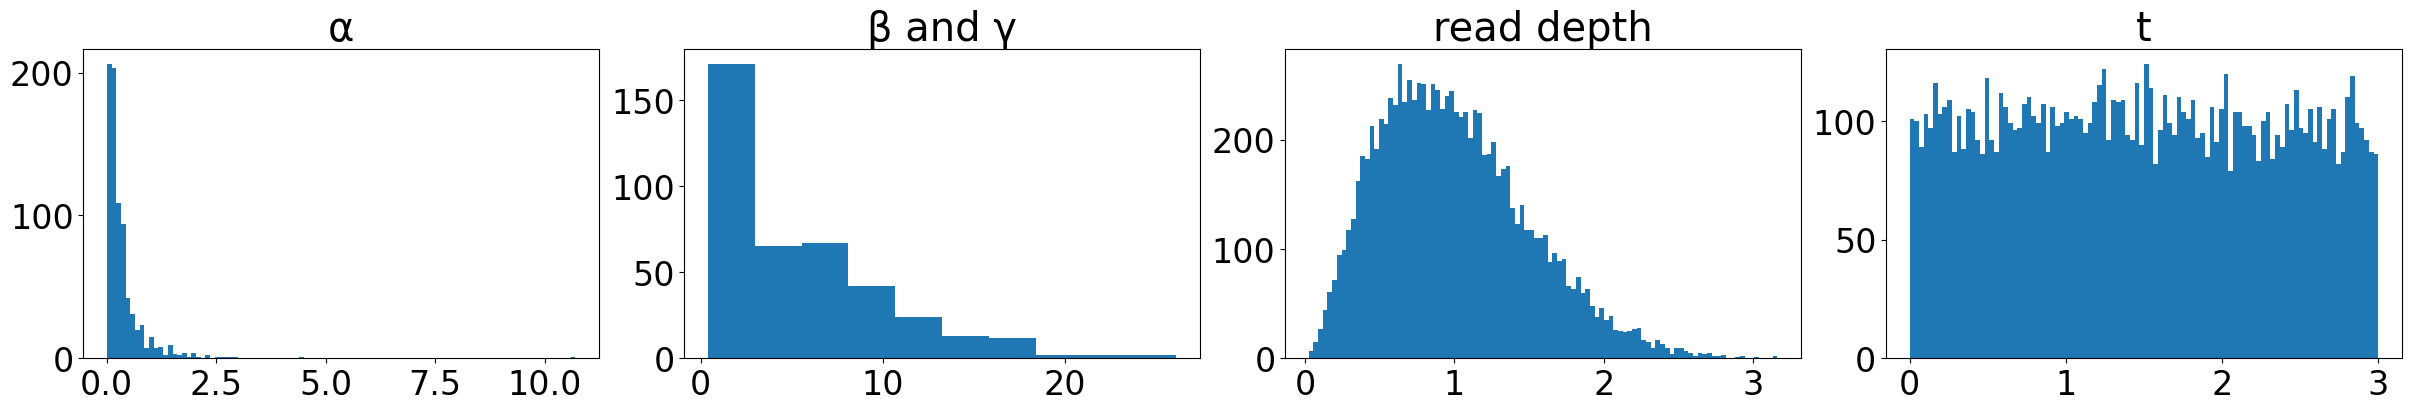

In [ ]:
# true_topo = np.array([[0,1,2], [0,1,3]])
# true_tau = (0, 2, 3)
# L = len(topo)
# n = 5000
# true_theta, true_t, Y, X, rd = simulate_demo_data(true_topo, true_tau, n=n, random_seed=42, filepath="data/sim_demo.h5ad")
# X.mean()

In [162]:
adata = ad.read("data/sim_demo.h5ad")
true_theta = np.array(adata.varm["theta"])
rd = np.array(adata.obs["read_depth"])
r = rd/rd.mean()
true_t = np.array(adata.obs["time"])
N, p = adata.X.shape
X = np.zeros((N,p,2))
X[:,:,1] = adata.layers["spliced"]
X[:,:,0] = adata.layers["unspliced"]
X.mean()

/mnt/lareaulab/reliscu/anaconda3/envs/chronocell/lib/python3.13/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


np.float64(1.14181425)

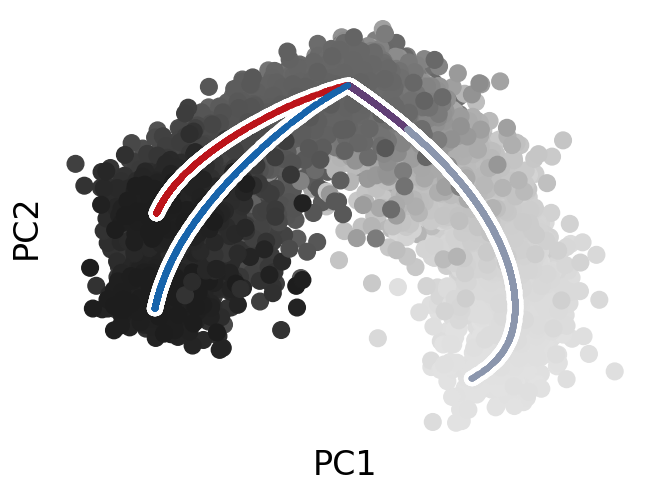

In [177]:
n = len(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.log1p(X.reshape(len(X),-1)/r[:,None]))
Y_pca = pca.transform(np.log1p(Y.reshape(len(Y),-1)))

light_purple = cmr.get_sub_cmap('Purples', 0., 1)(0.25)
purple = '#613f75'
blue = cmr.get_sub_cmap('Blues', 0., 1)(0.8)
red = cmr.get_sub_cmap('Reds', 0., 1)(0.8)

cmap_t = cmr.get_sub_cmap('Greys', 0.2, 0.9)
fig, ax = plt.subplots(1,1)
ax.scatter(X_pca[:,0],X_pca[:,1],c=true_t,cmap=cmap_t);

ax.scatter(Y_pca[(true_t > 1)&(true_t <= 2),0],Y_pca[(true_t > 1)&(true_t <= 2),1],s=100,color='w');
ax.scatter(Y_pca[(true_t>2) & (np.arange(n)>=n//L),0],Y_pca[(true_t>2) & (np.arange(n)>=n//L),1],s=100,color='w');
ax.scatter(Y_pca[(true_t>2) & (np.arange(n)<n//L),0],Y_pca[(true_t>2) & (np.arange(n)<n//L),1],s=100,color='w');
ax.scatter(Y_pca[(true_t<1) ,0],Y_pca[(true_t<1) ,1],s=100,color='w');

ax.scatter(Y_pca[(true_t > 1)&(true_t <= 2),0],Y_pca[(true_t > 1)&(true_t <= 2),1],s=10,color=purple);
ax.scatter(Y_pca[(true_t>2) & (np.arange(n)>=n//L),0],Y_pca[(true_t>2) & (np.arange(n)>=n//L),1],s=10,color=red);
ax.scatter(Y_pca[(true_t>2) & (np.arange(n)<n//L),0],Y_pca[(true_t>2) & (np.arange(n)<n//L),1],s=10,color=blue);
ax.scatter(Y_pca[true_t <= 1,0],Y_pca[(true_t <= 1),1],s=10,color='#8b96ad');
ax.set_xlabel('PC1',fontsize=24)
ax.set_ylabel('PC2',fontsize=24)
ax.set_frame_on(False)
plt.xticks([]);
plt.yticks([]);

In [178]:
traj = Trajectory(true_topo, true_tau, model="two_species_ss", verbose=1)
traj = traj.fit(X, warm_start=True, theta=theta, params={"r":rd/rd.mean()}, m=101, epoch=0)

fitting with warm start


0it [00:00, ?it/s]
